In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("all_stream_info_02min.xlsx")

In [3]:
df.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,109414598,2020-06-20 18:47:14 UTC,2020-06-21 07:06:36 UTC,44362,normalEnd,117,2020-06-20 21:48:29.745 UTC,0,3447,0,...,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,109389398,2020-06-19 09:03:21 UTC,2020-06-19 14:10:28 UTC,18427,normalEnd,355,2020-06-19 10:25:37.51 UTC,0,22479,0,...,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,109400631,2020-06-20 01:10:14 UTC,2020-06-20 05:11:00 UTC,14446,normalEnd,493,2020-06-20 02:27:30.522 UTC,0,28918,0,...,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
3,109353986,2020-06-17 03:17:46 UTC,2020-06-17 08:07:47 UTC,17401,normalEnd,464,2020-06-17 06:44:22.256 UTC,0,24303,0,...,1335,307,21,174253.0,127.94,34.44,2087,89,134532,1
4,109336156,2020-06-15 22:41:45 UTC,2020-06-16 04:22:56 UTC,20471,normalEnd,74,2020-06-15 23:13:27.554 UTC,0,773,0,...,773,300,191,668404.0,846.08,285.40,2767,24,26551,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 29 columns):
liveStreamID               3148 non-null int64
beginTime                  3148 non-null object
endTime                    3148 non-null object
duration                   3148 non-null int64
closeBy                    3051 non-null object
maxLiveViewerCount         3148 non-null int64
maxLiveViewerTime          1838 non-null object
privateLiveStream          3148 non-null int64
receivedLikeCount          3148 non-null int64
streamerType               3148 non-null int64
isShow                     3148 non-null bool
cultureGroup               0 non-null float64
userID                     3148 non-null object
registerTime               3148 non-null object
registerCountry            3148 non-null object
isContracted               0 non-null float64
uniqueViewerCount          3148 non-null int64
ios                        3148 non-null int64
android                    3148 non-null in

In [5]:
df.closeBy.value_counts()

normalEnd            2673
end by new stream     129
disconnect            127
Incoming call          65
Killed                 21
Freezed                16
Upload failed          13
Crash                   4
Publish failed          2
Keep alive failed       1
Name: closeBy, dtype: int64

In [6]:
df.drop(["liveStreamID","beginTime","endTime","maxLiveViewerTime","registerCountry","cultureGroup","isContracted","registerTime","userID"],axis=1,inplace=True)

In [7]:
categories = []
for filename in df["closeBy"]:
    if filename == 'normalEnd':
        categories.append(1)
    elif filename == 'end by new stream':
         categories.append(2)
    elif filename == 'disconnect':
         categories.append(3)
    elif filename == 'Incoming call':
         categories.append(4)
    elif filename == 'Killed':
         categories.append(5)
    elif filename == 'Freezed':
         categories.append(6)
    elif filename == 'Upload failed':
         categories.append(7)
    elif filename == 'Crash':
         categories.append(8)
    elif filename == 'Publish failed':
         categories.append(9)
    elif filename == 'Keep alive failed':
         categories.append(10)
            
    else:
        categories.append(0)
        

df["closeBy"] = categories

In [8]:
df.closeBy.value_counts()

1     2673
2      129
3      127
0       97
4       65
5       21
6       16
7       13
8        4
9        2
10       1
Name: closeBy, dtype: int64

In [9]:
sns.countplot(x='Target',data=df)

<IPython.core.display.Javascript object>

In [10]:
df.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,44362,1,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,18427,1,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,14446,1,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
3,17401,1,464,0,24303,0,False,1445,914,449,1335,307,21,174253.0,127.94,34.44,2087,89,134532,1
4,20471,1,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551,1


In [11]:
df.columns

Index(['duration', 'closeBy', 'maxLiveViewerCount', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'uniqueViewerCount',
       'ios', 'android', 'durationGTE5sec', 'durationGTE2min',
       'durationGTE10min', 'totalViewerDuration', 'avgViewerDuration',
       'avgStreamJoinDuration', 'count', 'followIncreaseEstimated',
       'receivePointEstimated', 'Target'],
      dtype='object')

In [12]:
df.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,44362,1,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,18427,1,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,14446,1,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
3,17401,1,464,0,24303,0,False,1445,914,449,1335,307,21,174253.0,127.94,34.44,2087,89,134532,1
4,20471,1,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

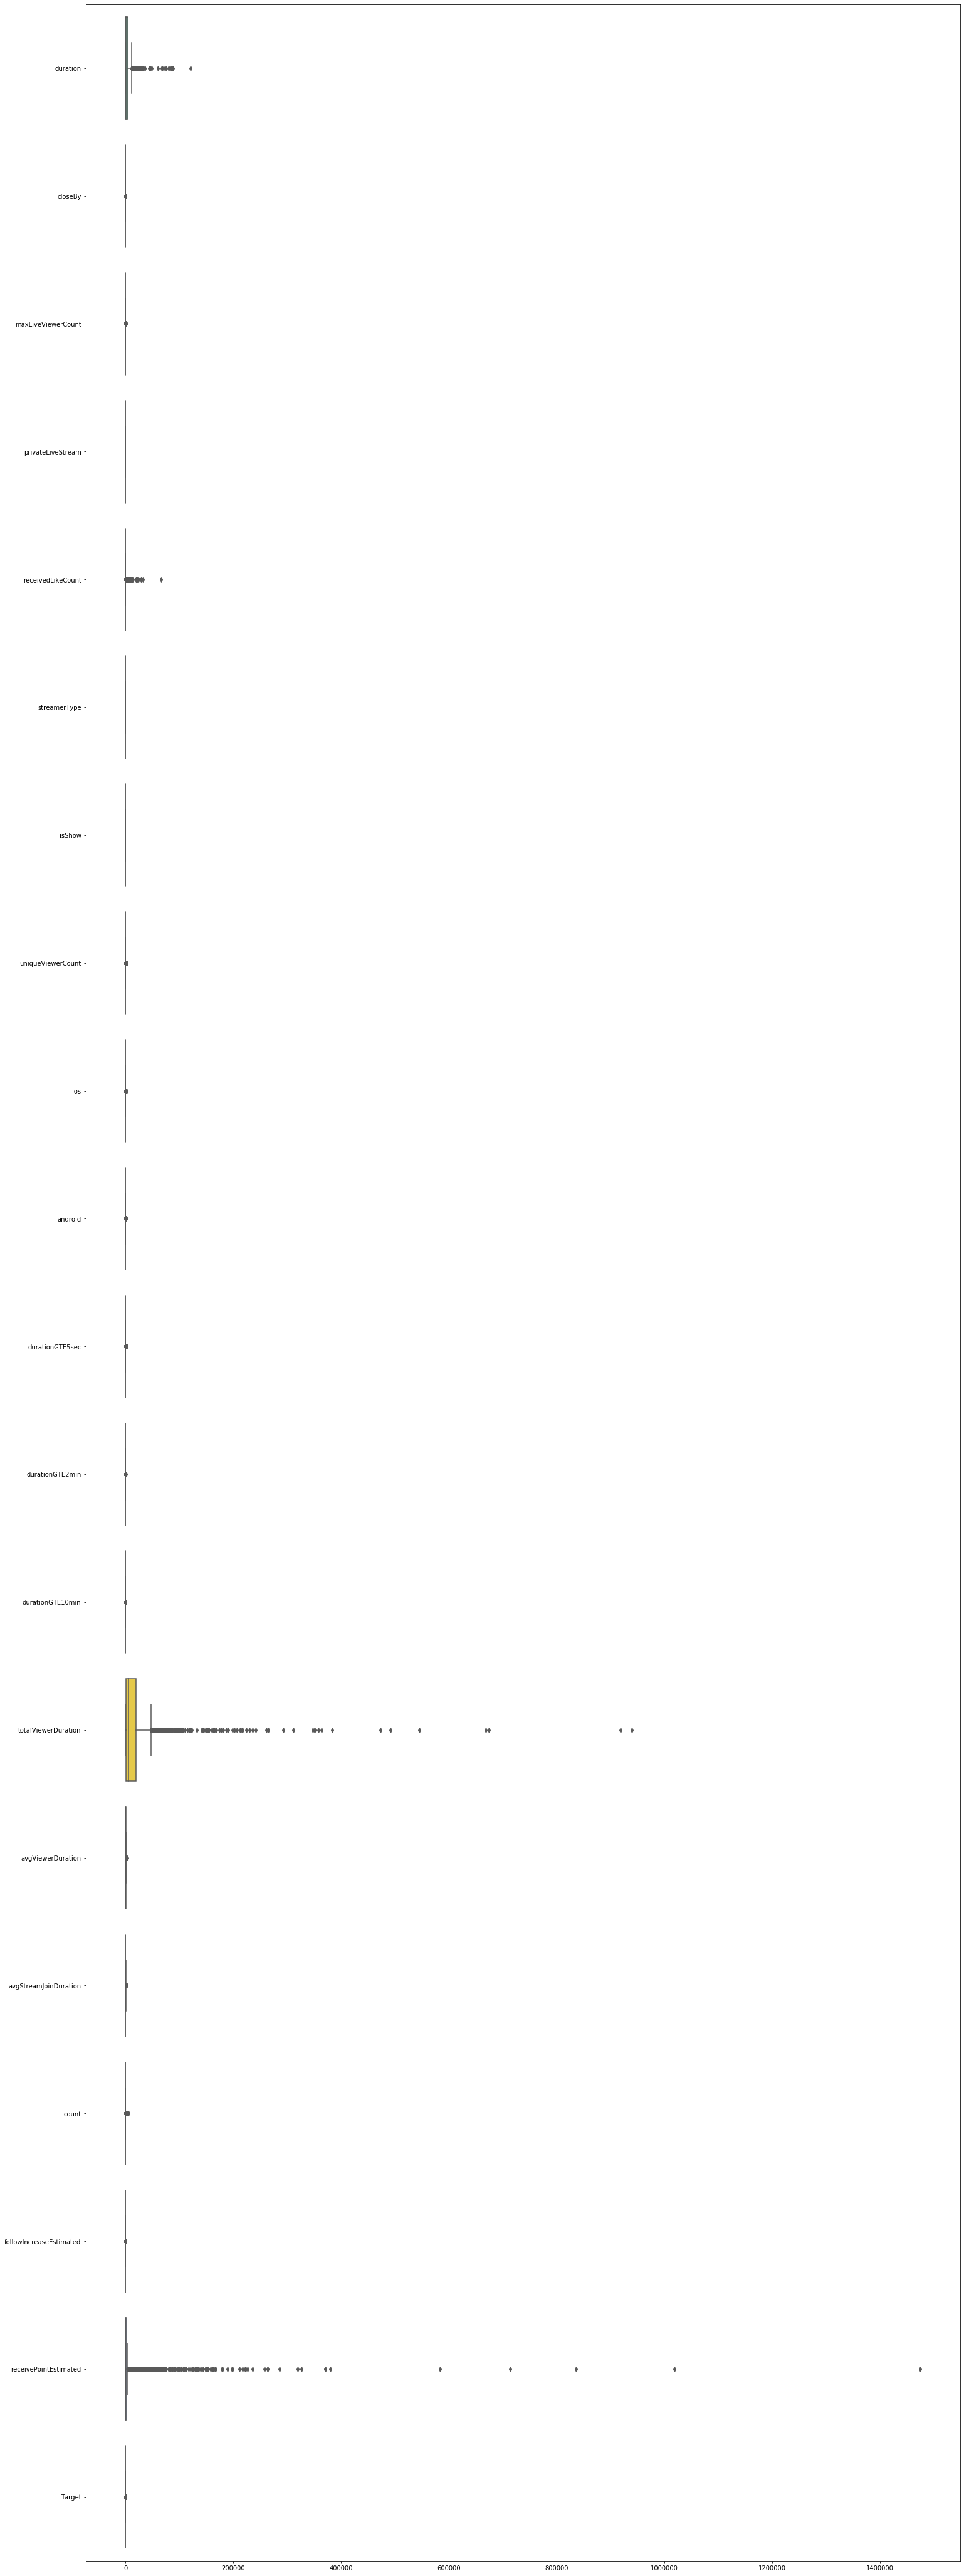

In [13]:
plt.figure(figsize=(25,75))
sns.boxplot(data=df, orient="h", palette="Set2")

In [14]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].median()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

In [15]:
def remove_zero_by_mean_value(df,col_in):
    x = df[df[col_in] != np.nan][col_in].median()
    df[col_in].replace(np.nan,x,inplace=True)

In [16]:
def remove_zero_by_mode_value(df,col_in):
    x = df[df[col_in] != np.nan][col_in].mode()
    df[col_in].replace(np.nan,x,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

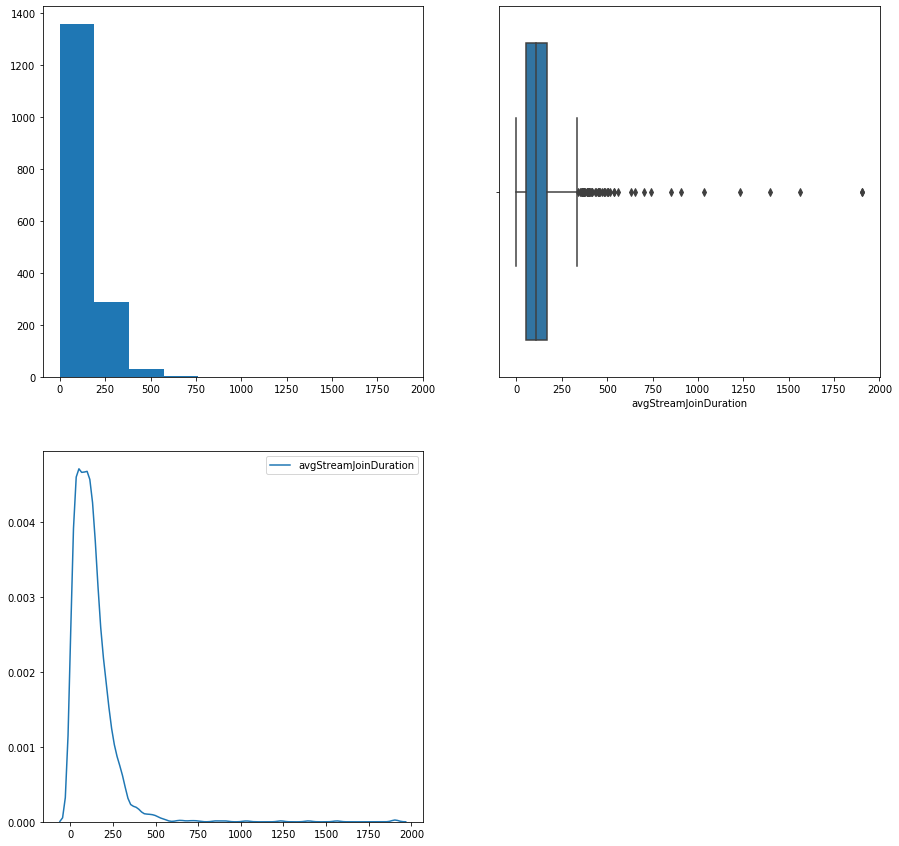

In [17]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['avgStreamJoinDuration'])
plt.subplot(222)
sns.boxplot(df['avgStreamJoinDuration'])
plt.subplot(223)
sns.kdeplot(df['avgStreamJoinDuration'])
remove_zero_by_mean_value(df,'avgStreamJoinDuration')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

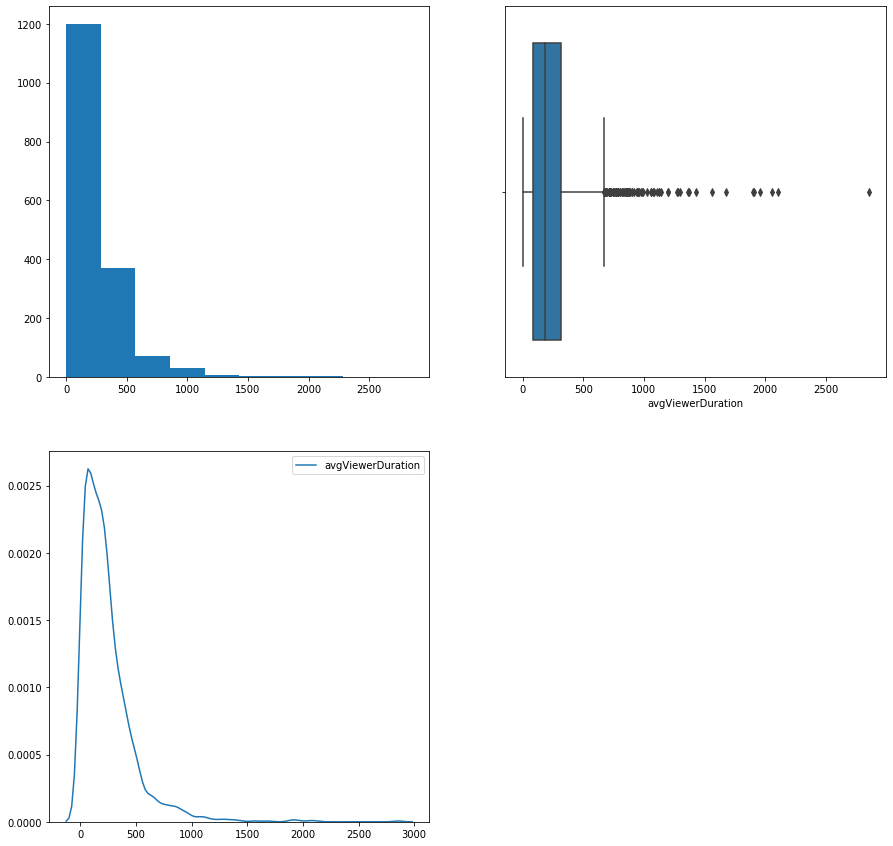

In [18]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['avgViewerDuration'])
plt.subplot(222)
sns.boxplot(df['avgViewerDuration'])
plt.subplot(223)
sns.kdeplot(df['avgViewerDuration'])
remove_zero_by_mean_value(df,'avgViewerDuration')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nitin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

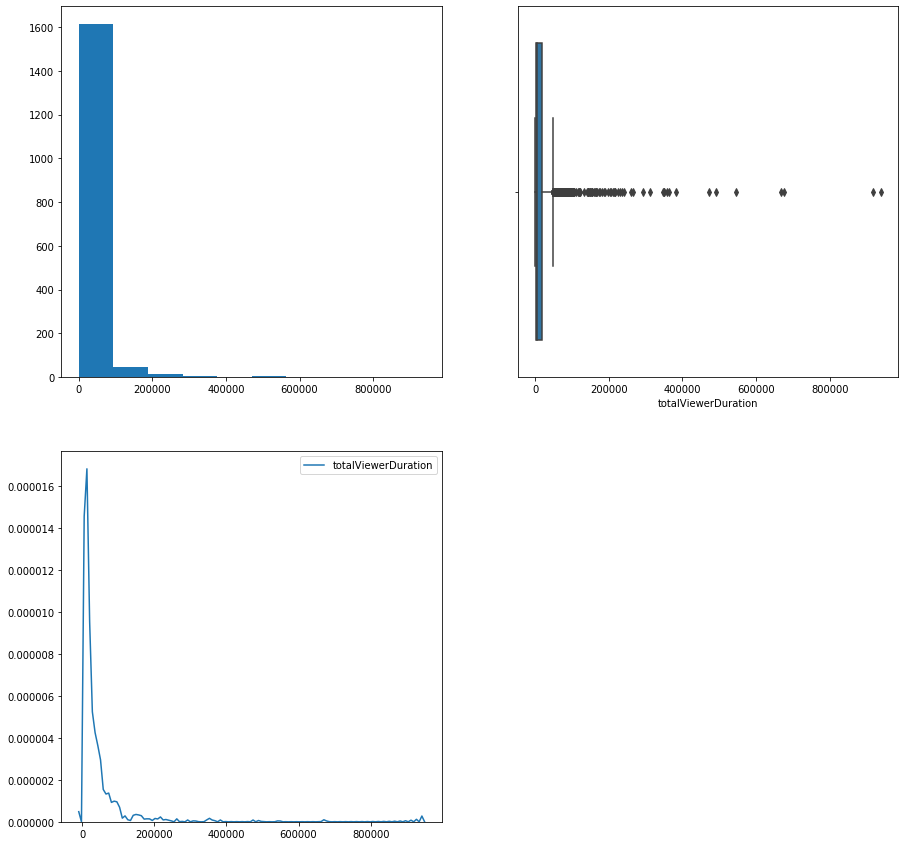

In [19]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['totalViewerDuration'])
plt.subplot(222)
sns.boxplot(df['totalViewerDuration'])
plt.subplot(223)
sns.kdeplot(df['totalViewerDuration'])
remove_zero_by_mean_value(df,'totalViewerDuration')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

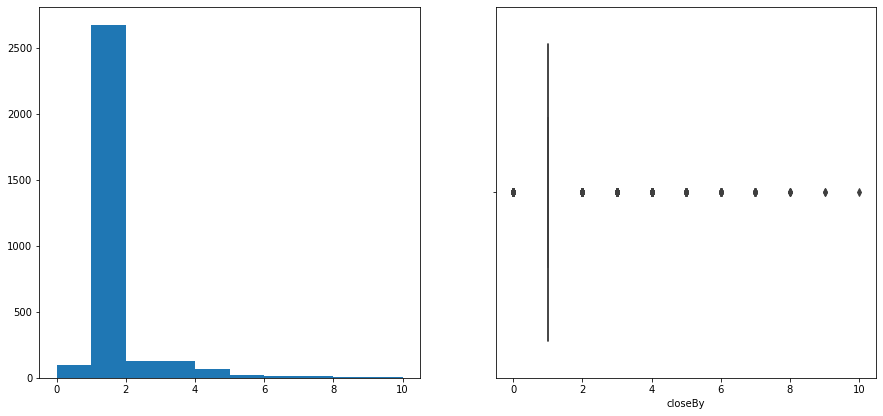

In [20]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['closeBy'])
plt.subplot(222)
sns.boxplot(df['closeBy'])

remove_zero_by_mode_value(df,'closeBy')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 20 columns):
duration                   3148 non-null int64
closeBy                    3148 non-null int64
maxLiveViewerCount         3148 non-null int64
privateLiveStream          3148 non-null int64
receivedLikeCount          3148 non-null int64
streamerType               3148 non-null int64
isShow                     3148 non-null bool
uniqueViewerCount          3148 non-null int64
ios                        3148 non-null int64
android                    3148 non-null int64
durationGTE5sec            3148 non-null int64
durationGTE2min            3148 non-null int64
durationGTE10min           3148 non-null int64
totalViewerDuration        3148 non-null float64
avgViewerDuration          3148 non-null float64
avgStreamJoinDuration      3148 non-null float64
count                      3148 non-null int64
followIncreaseEstimated    3148 non-null int64
receivePointEstimated      3148 non-null i

In [22]:
correlations = df.corr(method='pearson')
print(correlations)



                         duration   closeBy  maxLiveViewerCount  \
duration                 1.000000  0.005412            0.307272   
closeBy                  0.005412  1.000000           -0.042708   
maxLiveViewerCount       0.307272 -0.042708            1.000000   
privateLiveStream             NaN       NaN                 NaN   
receivedLikeCount        0.221690 -0.025516            0.686648   
streamerType                  NaN       NaN                 NaN   
isShow                        NaN       NaN                 NaN   
uniqueViewerCount        0.440732 -0.046446            0.806334   
ios                      0.431729 -0.044215            0.733755   
android                  0.409987 -0.048609            0.803905   
durationGTE5sec          0.433552 -0.047038            0.781332   
durationGTE2min          0.424474 -0.049622            0.583564   
durationGTE10min         0.395220 -0.044657            0.456965   
totalViewerDuration      0.384243 -0.040008            0.48197

<IPython.core.display.Javascript object>

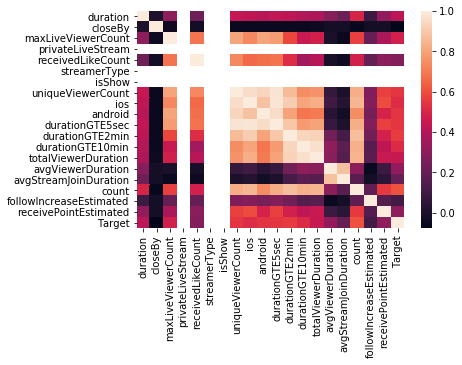

In [23]:
sns.heatmap(correlations)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:

X_res = df.ix[:,'duration':'receivePointEstimated']
y_res = df.iloc[:,-1].values

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/nitin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [26]:
X_res

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated
0,44362,1,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937
1,18427,1,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581
2,14446,1,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144
3,17401,1,464,0,24303,0,False,1445,914,449,1335,307,21,174253.0,127.94,34.44,2087,89,134532
4,20471,1,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0,0,0,0,0,0,False,0,0,0,0,0,0,5947.0,185.30,106.23,0,0,0
3144,0,0,0,0,0,0,False,0,0,0,0,0,0,5947.0,185.30,106.23,0,0,0
3145,0,0,0,0,0,0,False,0,0,0,0,0,0,5947.0,185.30,106.23,0,0,0
3146,0,0,0,0,0,0,False,0,0,0,0,0,0,5947.0,185.30,106.23,0,0,0


In [27]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [28]:

os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [29]:
X_res.shape

(5038, 19)

In [30]:
y_res.shape

(5038,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import Normalizer

In [33]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=2076,
                       verbose=0, warm_start=False)

In [36]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9841269841269841
[[492  16]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       508
           1       0.97      1.00      0.98       500

    accuracy                           0.98      1008
   macro avg       0.98      0.98      0.98      1008
weighted avg       0.98      0.98      0.98      1008



In [37]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_res,y_res,cv=10)

In [38]:
score.mean()

0.9777777777777779

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
model = GaussianNB()

In [41]:

model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9404761904761905
[[453  55]
 [  5 495]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       508
           1       0.90      0.99      0.94       500

    accuracy                           0.94      1008
   macro avg       0.94      0.94      0.94      1008
weighted avg       0.94      0.94      0.94      1008



In [42]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
model = SVC()

In [44]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.933531746031746
[[460  48]
 [ 19 481]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       508
           1       0.91      0.96      0.93       500

    accuracy                           0.93      1008
   macro avg       0.93      0.93      0.93      1008
weighted avg       0.94      0.93      0.93      1008



In [45]:

from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
model = neighbors.KNeighborsClassifier(3)

In [47]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9543650793650794
[[467  41]
 [  5 495]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       508
           1       0.92      0.99      0.96       500

    accuracy                           0.95      1008
   macro avg       0.96      0.95      0.95      1008
weighted avg       0.96      0.95      0.95      1008



In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8829365079365079
[[453  55]
 [ 63 437]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       508
           1       0.89      0.87      0.88       500

    accuracy                           0.88      1008
   macro avg       0.88      0.88      0.88      1008
weighted avg       0.88      0.88      0.88      1008



In [51]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(standarized_x,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:

y_pred = xgb_model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9861111111111112
[[495  13]
 [  1 499]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       508
           1       0.97      1.00      0.99       500

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008

